/home/andre/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


NameError: name 'xml2cm' is not defined

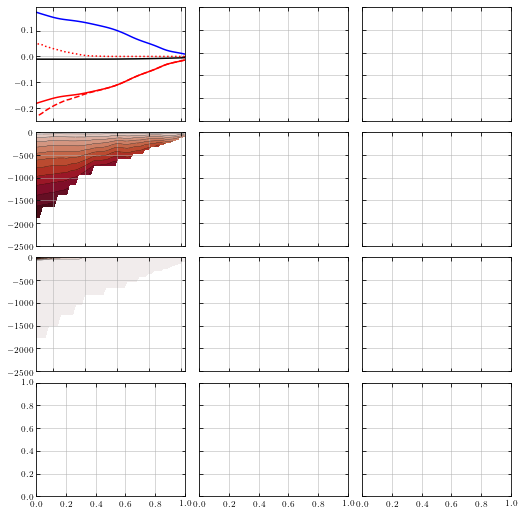

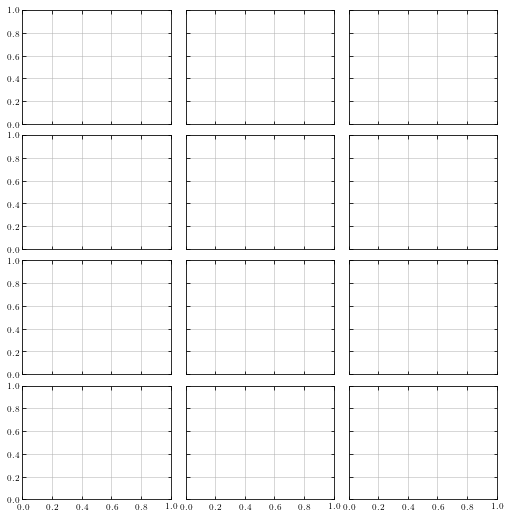

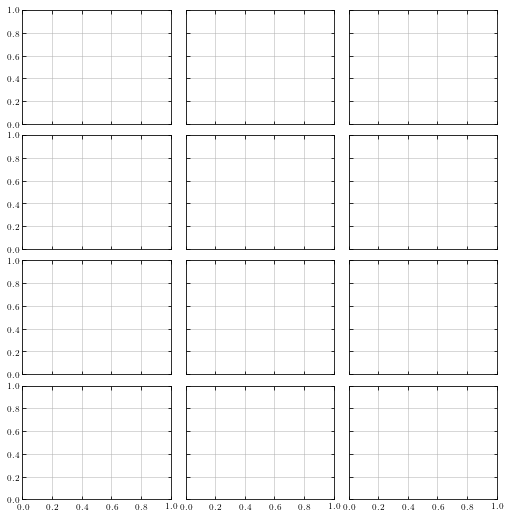

In [13]:
# Description: Plot Figure 4
#              -cross-slope profiles of transports
#              -contour plots of mean and eddy streamfunctions.
#
# Author:      André Palóczy
# E-mail:      paloczy@gmail.com
# Date:        May/2018

import sys
sys.path.append('../../misc')
sys.path.append('/home/andre/Dropbox/python-modules/pygamman')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
from reproducibility import savefig
from cmocean import cm as cmo
from cm_xml_to_matplotlib import make_cmap
from local_utils import gamman

plt.rc('text.latex', preamble=r'\usepackage{amsmath}')
#---
plt.close('all')
head = '../../data_reproduce_figs/'

fac_weddellC = 0.8
fac_rossW = 0.7
fac_maud = 1.3
fac_amundsen = 1.2
fac_amery = 1.2
fac_byrd = 0.3

fpsi = head + 'sec_subsegments_psimean_psieddy_uqxm_uqxe.npz'

# Load data.
dpsi = np.load(fpsi)

# Plot three representative sub-segments for the main manuscript, put others on supplementary materials.
segnames = ['Maud',
            'Amery_wE-EA',
            'Ross_W',
            'Byrd_W',
            'Bellingshausen_E',
            'weddell_C',
            'E-EA_E',
            'E_Ross',
            'Amundsen_E']

km2m = 1e3
m3toSv = 1e-6

Tmx = dpsi['Theta'].flatten()[0]
Smx = dpsi['Sp'].flatten()[0]
psim = dpsi['psimean'].flatten()[0]
psim = dpsi['psimean'].flatten()[0]
psie = dpsi['psieddy'].flatten()[0]
ht = dpsi['hx_yavgs'].flatten()[0]
zz_psim = dpsi['zm_psimean']
zz_psie = 0.5*(zz_psim[1:] + zz_psim[:-1]) # z_w.

zcap = 30
zz_psim = zz_psim[:zcap]
zz_psie = zz_psie[:zcap]

uqxt = dict()
lons = dpsi['lons'].flatten()[0]
lats = dpsi['lats'].flatten()[0]
dists = dpsi['dists'].flatten()[0]
Lys = dpsi['Lys'].flatten()[0]
ps = dpsi['p'].flatten()[0]
# Positive SOUTHWARD [onshore].
uqxm = dpsi['uqxm'].flatten()[0]
uqxe = dpsi['uqxe'].flatten()[0]
uqxe_adv = dpsi['uqxe_adv'].flatten()[0]
uqxe_stir = dpsi['uqxe_stir'].flatten()[0]
_ = [uqxt.update({seg:(uqxm[seg] + uqxe[seg])}) for seg in segnames]

axbb, axl, axc, axr = dict(), dict(), dict(), dict()
naxes = 3

figsize = (8.5, 9)
fig1, axx1 = plt.subplots(nrows=4, ncols=naxes, sharex=False, figsize=figsize)
fig2, axx2 = plt.subplots(nrows=4, ncols=naxes, sharex=False, figsize=figsize)
fig3, axx3 = plt.subplots(nrows=4, ncols=naxes, sharex=False, figsize=figsize)

axx1, axx2, axx3 = axx1.ravel(), axx2.ravel(), axx3.ravel()
axx_all = np.concatenate((axx1, axx2, axx3))
axx_top = np.concatenate((axx1[:naxes], axx2[:naxes], axx3[:naxes]))

_ = [axx1[n].xaxis.set_tick_params(labelbottom='off', labeltop='off') for n in range(naxes*3)]
_ = [axx2[n].xaxis.set_tick_params(labelbottom='off', labeltop='off') for n in range(naxes*3)]
_ = [axx3[n].xaxis.set_tick_params(labelbottom='off', labeltop='off') for n in range(naxes*3)]
_ = [axi.xaxis.set_tick_params(labelsize=9) for axi in axx_all]
_ = [axi.yaxis.set_tick_params(labelsize=9) for axi in axx_all]

axx_middle = np.concatenate((axx1[naxes:naxes*2], axx2[naxes:naxes*2], axx3[naxes:naxes*2]))
axx_bottom = np.concatenate((axx1[naxes*2:naxes*3], axx2[naxes*2:naxes*3], axx3[naxes*2:naxes*3]))
axx_bottom2 = np.concatenate((axx1[naxes*3:], axx2[naxes*3:], axx3[naxes*3:]))

# Tag each axis with its correct segment.
axl, axc, axr, axbb = dict(), dict(), dict(), dict()
_ = [axl.update({seg:axx_top[n]}) for seg, n in zip(segnames, range(len(segnames)))]
_ = [axc.update({seg:axx_middle[n]}) for seg, n in zip(segnames, range(len(segnames)))]
_ = [axr.update({seg:axx_bottom[n]}) for seg, n in zip(segnames, range(len(segnames)))]
_ = [axbb.update({seg:axx_bottom2[n]}) for seg, n in zip(segnames, range(len(segnames)))]

_ = [axx_top[n].yaxis.set_tick_params(labelleft='off') for n in range(1,naxes)]
_ = [axx_middle[n].yaxis.set_tick_params(labelleft='off') for n in range(1,naxes)]
_ = [axx_bottom[n].yaxis.set_tick_params(labelleft='off') for n in range(1,naxes)]
_ = [axx_bottom2[n].yaxis.set_tick_params(labelleft='off') for n in range(1,naxes)]
_ = [axx_top[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes+1, naxes*2)]
_ = [axx_middle[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes+1, naxes*2)]
_ = [axx_bottom[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes+1, naxes*2)]
_ = [axx_bottom2[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes+1, naxes*2)]
_ = [axx_top[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes*2+1, naxes*3)]
_ = [axx_middle[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes*2+1, naxes*3)]
_ = [axx_bottom[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes*2+1, naxes*3)]
_ = [axx_bottom2[n].yaxis.set_tick_params(labelleft='off') for n in range(naxes*2+1, naxes*3)]

Lys = dpsi['Lys'].flatten()[0]
ncontours_psim = 25
ncontours_psie = 150
xtt, ytt = 0.05, 0.05
yll, ylu = -1e-7, 1e-7
gammanm_levs = np.arange(27.0, 28.6, 0.2)
for seg in segnames:
    axbbi, axli, axci, axri = axbb[seg], axl[seg], axc[seg], axr[seg]
    di = dists[seg]
    Lyi = Lys[seg]*km2m
    uqxmi = (uqxm[seg]/Lyi)*1e3            # [MW/m].
    uqxei = (uqxe[seg]/Lyi)*1e3            # [MW/m].
    uqxe_stiri = (uqxe_stir[seg]/Lyi)*1e3  # [MW/m].
    uqxe_advi = (uqxe_adv[seg]/Lyi)*1e3    # [MW/m].

    if seg=='Ross_W':
        scale_fac = fac_rossW
    elif seg=='weddell_C':
        scale_fac = fac_weddellC
    elif seg=='Maud':
        scale_fac = fac_maud
    elif seg=='Amundsen_E':
        scale_fac = fac_amundsen
    elif seg=='Byrd_W':
        scale_fac = fac_byrd
    elif seg=='Amery_wE-EA':
        scale_fac = fac_amery
    else:
        scale_fac = 1

    uqxmi = uqxmi*scale_fac
    uqxei = uqxei*scale_fac
    uqxe_advi = uqxe_advi*scale_fac
    uqxe_stiri = uqxei - uqxe_advi # Recalculate Phi_stir after scaling Phi_eddy and Phi_adv.

    axli.plot(di, uqxmi, 'b', label=r'$\Phi^\text{mean}$') # Mean.
    axli.plot(di, uqxei, 'r', label=r'$\Phi^\text{eddy}$') # Eddy.
    uqxti = uqxmi + uqxei
    axli.plot(di, uqxti, 'k', linestyle='-', label=r'$\Phi$') # Total.

    # Eddy stirring and eddy advection.
    # axli2 = axli.twinx()
    axli.plot(di, uqxe_stiri, 'r--', label=r'$\Phi^\text{eddy}_\text{stir}$') # Eddy stirring.
    axli.plot(di, uqxe_advi, 'r:', label=r'$\Phi^\text{eddy}_\text{adv}$') # Eddy advection.
    axli.set_xlim((di[-1], di[0]))

    #
    # Mean streamfunction.
    #
    psimm = psim[seg][:zcap,:]*Lys[seg]*km2m*m3toSv # [Sv].
    htt = -ht[seg]
    for nnx in range(len(htt)):
        psimm[zz_psim<htt[nnx], nnx] = np.nan
    psimm_aux = np.abs(psimm)[~np.isnan(psimm)]
    psim_max = psimm_aux.max()#np.percentile(psimm_aux, 98)
    psim_levs = np.linspace(-psim_max, psim_max, ncontours_psim)
    cs = axci.contourf(di, zz_psim, psimm, psim_levs, vmin=-psim_max, vmax=psim_max, cmap=cmo.balance_r) # Make red be onshore because u = -dpsim/dz.
    axci.contour(di, zz_psim, psimm, psim_levs, linewidths=0.3, colors='k', linestyles='solid')
    axci.set_ylim((-2500, 0))#((-1800, 0))
    axci.set_xlim((di[-1], di[0]))
    if seg=='Maud':
        csm_Maud = np.copy(cs).flatten()[0]
    elif seg=='Ross_W':
        csm_W_Ross = np.copy(cs).flatten()[0]
    elif seg=='Amundsen_E':
        csm_E_Amundsen = np.copy(cs).flatten()[0]

    #
    # Eddy streamfunction.
    #
    psiee = psie[seg][:zcap,:]*Lys[seg]*km2m*m3toSv # [Sv].
    for nnx in range(len(htt)):
        psiee[zz_psie<htt[nnx], nnx] = np.nan
    psiee_aux = np.abs(psiee)[~np.isnan(psiee)]
    psie_max = psiee_aux.max()#np.percentile(psiee_aux, 90)
    psie_levs = np.linspace(-psie_max, psie_max, ncontours_psie)
    cs = axri.contourf(di, zz_psie, psiee, psie_levs, vmin=-psie_max, vmax=psie_max, cmap=cmo.balance_r)
    # cs = axri.pcolormesh(di, zz_psie, psiee, vmin=-psie_max, vmax=psie_max, cmap=cmo.balance)
    axri.contour(di, zz_psie, psiee, psie_levs[::10], linewidths=0.2, colors='k', linestyles='solid')
    axri.set_ylim((-2500, 0))#((-1800, 0))
    axri.set_xlim((di[-1], di[0]))
    if seg=='Maud':
        cse_Maud = np.copy(cs).flatten()[0]
    elif seg=='Ross_W':
        cse_W_Ross = np.copy(cs).flatten()[0]
    elif seg=='Amundsen_E':
        cse_E_Amundsen = np.copy(cs).flatten()[0]

    #
    # Potential temperature and isopycnals.
    #
    dT = 0.1
    T_min, T_max = -2.1, 2.1#-2, 2
    Tm_levs = np.arange(T_min, T_max+dT, dT)
    Tmxi = np.ma.masked_greater(Tmx[seg][:zcap,:], 1e5) # [degrees C].
    Smxi = np.ma.masked_greater(Smx[seg][:zcap,:], 1e5) # [psu].

    pxi, lonxi, latxi = ps[seg].squeeze()[:zcap], lons[seg], lats[seg]
    gammanxi = Tmxi*np.nan
    for n in range(latxi.size):
        gammanxi[:,n], _, _ = gamman(Smxi.data[:,n], Tmxi.data[:,n], pxi, lonxi[n], latxi[n])

    for nnx in range(len(htt)):
        Tmxi[zz_psim<htt[nnx], nnx] = np.nan
        Smxi[zz_psim<htt[nnx], nnx] = np.nan
        gammanxi[zz_psim<htt[nnx], nnx] = np.nan

    # cmapname = '4w_ROTB.xml'
    cmapname = head + '3-wave-yellow-grey-blue.xml'
    cmT = get_cmap(make_cmap(cmapname)).reversed()
    cs = axbbi.contourf(di, zz_psim, Tmxi, Tm_levs, vmin=T_min, vmax=T_max, linestyles='none', cmap=cmT, zorder=1)
    # axbbi.contour(di, zz_psim, Tmxi, Tm_levs, linewidths=0.3, colors='k', linestyles='solid', zorder=1)
    cc = axbbi.contour(di, zz_psim, gammanxi, gammanm_levs, linewidths=1.0, colors='w', linestyles='solid', zorder=2)
    axbbi.clabel(cc, fontsize=8, fmt='%1.1f')
    axbbi.set_ylim((-2500, 0))#((-1800, 0))
    axbbi.set_xlim((di[-1], di[0]))
    if seg=='Maud':
        csT_Maud = np.copy(cs).flatten()[0]
    elif seg=='Ross_W':
        csT_W_Ross = np.copy(cs).flatten()[0]
    elif seg=='Amundsen_E':
        csT_E_Amundsen = np.copy(cs).flatten()[0]

def _add_colorbar(fig, csm, cse, csT, coordsm, coordse, coordsT, Tmmin, Tmmax):
    # psimmax, psiemax = int(psimmax), int(psiemax)
    cbaxm = fig.add_axes(coordsm)
    cbaxe = fig.add_axes(coordse)
    cbaxT = fig.add_axes(coordsT)
    cbm = plt.colorbar(mappable=csm, cax=cbaxm, orientation='horizontal', extend='neither')
    cbe = plt.colorbar(mappable=cse, cax=cbaxe, orientation='horizontal', extend='neither')
    cbT = plt.colorbar(mappable=csT, cax=cbaxT, orientation='horizontal', extend='neither')
    cbm.ax.xaxis.set_tick_params(labelsize=9, pad=2)
    cbm.ax.xaxis.set_ticks_position('top')

    cbe.ax.xaxis.set_tick_params(labelsize=9, pad=2)
    cbe.ax.xaxis.set_ticks_position('top')
    # Tmmid = 0.5*(Tmmin + Tmmax)
    cbT.ax.xaxis.set_tick_params(labelsize=9, pad=2)
    cbT.ax.xaxis.set_ticks_position('top')
    cbT.set_ticks([-2, -1, 0, 1, 2])
    cbm.set_label(r'$\psi^\text{mean}$ [Sv]', fontsize=15, fontweight='normal')
    cbe.set_label(r'$\psi^\text{eddy}$ [Sv]', fontsize=15, fontweight='normal')
    cbT.set_label(r'$\theta$ [$^\circ$C]', fontsize=15, fontweight='normal')

    return cbm, cbe

# coordsm1 = [0.18, 0.60, 0.10, 0.006]
# coordse1 = [0.18, 0.40, 0.10, 0.006]
# coordsT1 = [0.15, 0.20, 0.15, 0.006]
coordsm2 = [0.398, 0.60, 0.10, 0.006]
coordse2 = [0.398, 0.40, 0.10, 0.006]
coordsT2 = [0.398, 0.20, 0.15, 0.006]
# coordsm3 = [0.15, 0.60, 0.10, 0.006]
# coordse3 = [0.15, 0.40, 0.10, 0.006]
# coordsT3 = [0.15, 0.17, 0.15, 0.006]

coordsm1 = coordsm2
coordse1 = coordse2
coordsT1 = coordsT2
coordsm3 = coordsm2
coordse3 = coordse2
coordsT3 = coordsT2
coordsm3[0] = 0.41
coordse3[0] = 0.41
coordsT3[1] = 0.15

csm_Maud, cse_Maud = _add_colorbar(fig1, csm_Maud, cse_Maud, csT_Maud, coordsm1, coordse1, coordsT1, T_min, T_max)
csm_W_Ross, cse_W_Ross = _add_colorbar(fig2, csm_W_Ross, cse_W_Ross, csT_W_Ross, coordsm2, coordse2, coordsT2, T_min, T_max)
csm_E_Amundsen, cse_E_Amundsen = _add_colorbar(fig3, csm_E_Amundsen, cse_E_Amundsen, csT_E_Amundsen, coordsm3, coordse3, coordsT3, T_min, T_max)

csm_Maud.set_ticks([-10, 0, 10])
cse_Maud.set_ticks([-10, 0, 10])
csm_W_Ross.set_ticks([-15, 0, 15])
cse_W_Ross.set_ticks([-10, 0, 10])
csm_E_Amundsen.set_ticks([-0.9, 0, 0.9])
cse_E_Amundsen.set_ticks([-4, 0, 4])

def _adjust_legend(ax):
    legh = ax.legend(fontsize=11, loc=(0.01, 0.50), frameon=False, ncol=2, handlelength=1, handletextpad=0.3, columnspacing=0.5)
    for legobj, legtxt in zip(legh.legendHandles, legh.get_texts()):
        legobj.set_linewidth(2.0)
        legtxt.set_color(legobj.get_color())

_ = _adjust_legend(axx_top[2])
_ = _adjust_legend(axx_top[5])
_ = _adjust_legend(axx_top[6])

# IMPORTANT: Set the ytick limits to be the same for all top panels of each figure.
_ = [axxi.set_ylim((-0.25, 0.25)) for axxi in axx_top[:naxes]]
_ = [axxi.set_ylim((-0.15, 0.15)) for axxi in axx_top[naxes:naxes*2]]
_ = [axxi.set_ylim((-0.28, 0.28)) for axxi in axx_top[2*naxes:]]

lightgray = [0.7]*3
_ = [axc[seg].set_facecolor(lightgray) for seg in segnames]
_ = [axr[seg].set_facecolor(lightgray) for seg in segnames]
_ = [axbb[seg].set_facecolor(lightgray) for seg in segnames]
axx_top[0].set_ylabel(r'HT density [MW/m]', fontsize=15, fontweight='black', labelpad=2)
axx_top[naxes].set_ylabel(r'HT density [MW/m]', fontsize=15, fontweight='black', labelpad=2)
axx_top[naxes*2].set_ylabel(r'HT density [MW/m]', fontsize=15, fontweight='black', labelpad=2)
axx_bottom[0].set_ylabel(r'Depth [m]', fontsize=18, fontweight='black', labelpad=2)
axx_bottom[naxes].set_ylabel(r'Depth [m]', fontsize=18, fontweight='black', labelpad=2)
axx_bottom[naxes*2].set_ylabel(r'Depth [m]', fontsize=18, fontweight='black', labelpad=2)
axx_bottom2[1].set_xlabel(r'Pseudo-cross-slope distance from the 1000 m isobath, $x^\star$ [km]', fontsize=15, fontweight='black', labelpad=2)
axx_bottom2[1+naxes].set_xlabel(r'Pseudo-cross-slope distance from the 1000 m isobath, $x^\star$ [km]', fontsize=15, fontweight='black', labelpad=2)
axx_bottom2[1+naxes*2].set_xlabel(r'Pseudo-cross-slope distance from the 1000 m isobath, $x^\star$ [km]', fontsize=15, fontweight='black', labelpad=2)

# Legends, colorbars and segment names.
segtitles = {'weddell_C':r'Central Weddell $\times$ %1.1f'%fac_weddellC,
            'Maud':r'Maud $\times$ %1.1f'%fac_maud,
            'Ross_W':r'West Ross $\times$ %1.1f'%fac_rossW,
            'E_Ross':r'East Ross',
            'Byrd_W':r'West Byrd $\times$ %1.1f'%fac_byrd,
            'Bellingshausen_E':r'East Bellingshausen',
            'E-EA_E':r'Oates',
            'Amery_wE-EA':r'Amery $\times$ %1.1f'%fac_amery,
            'Amundsen_E':r'East Amundsen $\times$ %1.1f'%fac_amundsen}

_ = [axl[seg].set_title(segtitles[seg], fontsize=12, fontweight='black') for seg in segnames]

txt_letter_top = [r'(a)', r'(b)', r'(c)']
txt_letter_middle = [r'(d)', r'(e)', r'(f)']
txt_letter_bottom = [r'(g)', r'(h)', r'(i)']
txt_letter_bottom2 = [r'(j)', r'(k)', r'(l)']
txt_letter_all = [r'(a)', r'(b)', r'(c)', r'(d)', r'(e)', r'(f)', r'(g)', r'(h)', r'(i)', r'(j)', r'(k)', r'(l)']*naxes
xtxt_letter, ytxt_letter = 0.1, 0.07
kwtxt = dict(fontsize=18, fontweight='black', ha='center')
for n in range(len(txt_letter_all)):
    axx_all[n].text(xtxt_letter, ytxt_letter, txt_letter_all[n], transform=axx_all[n].transAxes, **kwtxt)

_ = [axi.grid(False) for axi in axx_all]
_ = [axi.axvline(x=0, color='m', linewidth=1.0) for axi in axx_all]

# Force the y axes in the first row to be equal.
_ = [axi.invert_xaxis() for axi in axx_all]
fig1.subplots_adjust(hspace=0.025, wspace=0.025)
fig2.subplots_adjust(hspace=0.025, wspace=0.025)
fig3.subplots_adjust(hspace=0.025, wspace=0.025)

plt.show()

kwsavefig = dict(bbox_inches='tight', pad_inches=0.0, dpi=150)

fig3.savefig('fig_xisob_phi_psi0.eps', **kwsavefig)
fig3.savefig('fig_xisob_phi_psi0.png', **kwsavefig)
fig1.savefig('fig_xisob_phi_psiS1.eps', **kwsavefig)
fig2.savefig('fig_xisob_phi_psiS2.eps', **kwsavefig)
